# Laboratorio de Redes Neuronales
# Algoritmos Grupo 2
# 2022-2
#### - Hector Alfonso 
#### - Francesca Bonilla 
#### - Paula Velosa
#### - Sergio Sánchez
#### - Reinaldo Toledo

# Parte 1.
#Ejecución del algoritmo 
##(se comenta la complejidad de cada sentencia en el código)

###Codigo e implementación https://github.com/Psychofun/Red-Neuronal-Numpy
Autor: PsyFun
##Preprocesamiento de los datos, para estandarizar ("gre","gpa") e individualizar la caracteristica categorica "rank"

In [331]:
import numpy as np
import pandas as pd

admissions = pd.read_csv('/content/drive/Shareddrives/Algoritmos G3/Laboratorios/lab RN/binary.csv')    # la ubicación del archivo es la de la unidad compartida del grupo O(1)
print(admissions.describe())   # O(1)
print(admissions.shape)        # O(1)      
print(admissions.head())       # O(1)

            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000
(400, 4)
   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


#Conversion de una variable categorica "rank" a variables binarias "rank_1","rank_2","rank_3", "rank_4"

In [332]:
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1) # O(1)
print(data.describe())            # O(1)
data = data.drop('rank', axis=1)  # O(1)
print(data.shape)                 # O(1)
print(data.head())                # O(1)

            admit         gre         gpa       rank      rank_1      rank_2  \
count  400.000000  400.000000  400.000000  400.00000  400.000000  400.000000   
mean     0.317500  587.700000    3.389900    2.48500    0.152500    0.377500   
std      0.466087  115.516536    0.380567    0.94446    0.359955    0.485369   
min      0.000000  220.000000    2.260000    1.00000    0.000000    0.000000   
25%      0.000000  520.000000    3.130000    2.00000    0.000000    0.000000   
50%      0.000000  580.000000    3.395000    2.00000    0.000000    0.000000   
75%      1.000000  660.000000    3.670000    3.00000    0.000000    1.000000   
max      1.000000  800.000000    4.000000    4.00000    1.000000    1.000000   

           rank_3      rank_4  
count  400.000000  400.000000  
mean     0.302500    0.167500  
std      0.459916    0.373889  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.

Estandarizacion de las variables ("gre","gpa")

In [333]:
# Standarize features
for field in ['gre', 'gpa']:                    # O(len['gre','gpa']) = O(2)
    mean, std = data[field].mean(), data[field].std()   #O(1)
    data.loc[:,field] = (data[field]-mean)/std          #O(2)
    
print(data.shape)         # O(1)
print(data.describe())    # O(1)

(400, 7)
            admit           gre           gpa      rank_1      rank_2  \
count  400.000000  4.000000e+02  4.000000e+02  400.000000  400.000000   
mean     0.317500 -3.907985e-16  2.198242e-16    0.152500    0.377500   
std      0.466087  1.000000e+00  1.000000e+00    0.359955    0.485369   
min      0.000000 -3.183094e+00 -2.968993e+00    0.000000    0.000000   
25%      0.000000 -5.860633e-01 -6.829288e-01    0.000000    0.000000   
50%      0.000000 -6.665712e-02  1.340106e-02    0.000000    0.000000   
75%      1.000000  6.258844e-01  7.360075e-01    0.000000    1.000000   
max      1.000000  1.837832e+00  1.603135e+00    1.000000    1.000000   

           rank_3      rank_4  
count  400.000000  400.000000  
mean     0.302500    0.167500  
std      0.459916    0.373889  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.000000  


dividir el conjunto de datos para entrenamiento y evaluación del modelo

In [334]:
print(data.index)   # O(1)

RangeIndex(start=0, stop=400, step=1)


In [335]:
# Split off random 10% of the data for testing
np.random.seed(21)          # O(1)

sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False) #O(1)
train_data, test_data = data.iloc[sample], data.drop(sample)    # O(1)
print(train_data.shape)   # O(1)
print(test_data.shape)    # O(1)

(360, 7)
(40, 7)


División de los datos en caracteristicas y etiquetas

In [336]:
features, targets = train_data.drop('admit', axis=1), train_data['admit']         # O(1)
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit'] # O(1)

Función de Activación

In [337]:
def sigmoide(x):
    return 1/(1 + np.exp(-x)) # O(1)

In [338]:
# Hyperparameters
n_hidden = 2 # Número de unidades en la capa escondida                      O(1)
epochs = 11 # Número de iteraciones sobre el conjunto de entrenamiento    O(1)
alpha = 0.01 # Taza de aprendizaje                                          O(1)

ult_costo = None 

m,k = features.shape # Número de ejemplos de entrenamiento, número de dimensiones en los datos O(1)
# Inicialización de los pesos
entrada_escondida = np.random.normal(scale = 1/k**0.5,size = (k,n_hidden))  # O(1)
escondida_salida = np.random.normal(scale = 1/k**0.5,size = n_hidden)       # O(1)
print(entrada_escondida.shape)                                              # O(1)
print(escondida_salida.shape)                                               # O(1)
# Entrenamiento

for e in range(epochs):                                                     # O(epochs)
    # Variables para el gradiente
    gradiente_entrada_escondida = np.zeros(entrada_escondida.shape)
    gradiente_escondida_salida =  np.zeros(escondida_salida.shape)
    # Itera sobre el conjunto de entrenamiento
    for x,y in zip(features.values,targets):                                # O(min(len(features.values,targets)))                               
        # Pasada hacia adelande (forward pass) or forward propagation
        z = sigmoide(np.matmul(x, entrada_escondida))                       # O(1)
        y_ =sigmoide(np.matmul(escondida_salida,z)) # predicción            # O(1)
        # Pasada hacia atrás (backward pass)
        salida_error = (y - y_) * y_ *(1- y_)                               # O(1)
        
        escondida_error = np.dot(salida_error, escondida_salida) * z * (1 -z) # O(1)

        gradiente_entrada_escondida += escondida_error * x[:,None]          # O(1)
        gradiente_escondida_salida += salida_error * z                      # O(1)
    # Actualiza los parámetros (pesos)
    entrada_escondida += alpha * gradiente_entrada_escondida / m            # O(1)
    escondida_salida +=  alpha * gradiente_escondida_salida / m             # O(1)

    if e % (epochs / 10 ) == 0:                                             # O(1)
        z = sigmoide(np.dot(features.values, entrada_escondida))            # O(1)
        y_ = sigmoide(np.dot(z, escondida_salida))                          # O(1)

        # Función de costo
        costo = np.mean(( y_ - targets)**2 )                                # O(1)

        if ult_costo  and ult_costo < costo:                                # O(1)
            print("Costo de  entrenamiento: ", costo, " ADVERTENCIA -  Costo subiendo") # O(1)
        else:
            print("Costo de entrenamiento: ", costo )                       # O(1)
        
        ult_costo = costo                                                   # O(1)

#  Precisión en los datos de prueba 
z = sigmoide(np.dot(features_test, entrada_escondida))                      # O(1)
y_ = sigmoide(np.dot(z, escondida_salida))                                  # O(1)



predicciones =  y_ > 0.5    
#print(predicciones)                                                # O(1)
precision = np.mean(predicciones == targets_test)                           # O(1)
print("Precisión: {:.3f}".format(precision))                                # O(1)




(6, 2)
(2,)
Costo de entrenamiento:  0.22749585224305116
Precisión: 0.650


# Paso 2

###Cálculo de la complejidad en tiempo Big O() del algoritmo de redes neuronales anterior una vez identificada la complejidad de cada sentencia individualmente en el código

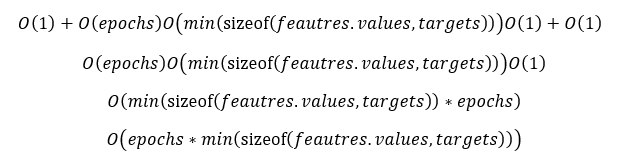

# Paso 3

### Identificación el parámetro de la red neuronal que afecta en mayor medida el consumo de tiempo de ejecución.

#### 1- En principio tenemos dos opciones de parámetros que influyen en mayor medida el consumo de tiempo de ejecución, estos corresponden a la variable epochs y al tamaño de los arreglos de targets y features.values (el menor de estos dos aunque en el algoritmo siempre se asume que ambos arreglos tienen el mismo tamaño

#### 2- No obstante, el único parámetro como tal de la red neuronal de nuestras opciones termina siendo la variable echos ya que los arreglos targets y features.values dependen directamente de una acción involucrada con el DataSet inicial, es decir, depende directamente de los datos iniciales por lo que no lo consideramos un parámetro

### En este sentido, podemos concluir que el parámetro que más influye en este algoritmo corresponde al número de iteraciones sobre el conjunto de datos, es decir, la variable 'echos'.

## Paso 4

### Construir un experimento, que le permita encontrar la cantidad de épocas suficientes, para entrenar esta red neuronal con los mismos datos.


#####SOLUCIÓN:  Dado que el indicador para determinar la preparación de esta red neuronal viene dado por la precisión, que entre más cercana a uno tiene el valor esta variable, mejor entrenada queda nuestra red, se realizarán experimentos con con la variable de iteraciones echo con un valor de 100 y se encontró que para esta cantidad máxima de iteraciones, existen valores específicos donde la precisión llega a ser mayor.

##### No obstante, no se tiene la certeza de si el valor máximo obtenido sea el mejor valor de iteración total para el entrenamiento de la red, esto debido a que se comprueba con un máximo de 100 iteraciones, y realizar este experimento con un número mayor máximo de iteraciones demandaría un tiempo de ejecución mucho mayor. Por lo tanto, basaremos el experimento para 100 iteraciones como máximo.

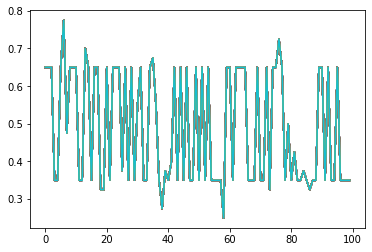

In [339]:
 import matplotlib.pyplot as plt

 precisiones= []
 iteraciones = []
 
 for i in range(100):
  # Hyperparameters
  n_hidden = 2 # Número de unidades en la capa escondida                      O(1)
   
  alpha = 0.01 # Taza de aprendizaje                                          O(1)

  ult_costo = None 

  m,k = features.shape # Número de ejemplos de entrenamiento, número de dimensiones en los datos O(1)
  # Inicialización de los pesos
  entrada_escondida = np.random.normal(scale = 1/k**0.5,size = (k,n_hidden))  # O(1)
  escondida_salida = np.random.normal(scale = 1/k**0.5,size = n_hidden)       # O(1)
  #print(entrada_escondida.shape)                                              # O(1)
  #print(escondida_salida.shape)                                               # O(1)
  # Entrenamiento


  for e in range(i):                                                     # O(epochs)
      # Variables para el gradiente
      gradiente_entrada_escondida = np.zeros(entrada_escondida.shape)
      gradiente_escondida_salida =  np.zeros(escondida_salida.shape)
      # Itera sobre el conjunto de entrenamiento
      for x,y in zip(features.values,targets):                                # O(min(len(features.values,targets)))                               
          # Pasada hacia adelande (forward pass) or forward propagation
          z = sigmoide(np.matmul(x, entrada_escondida))                       # O(1)
          y_ =sigmoide(np.matmul(escondida_salida,z)) # predicción            # O(1)
          # Pasada hacia atrás (backward pass)
          salida_error = (y - y_) * y_ *(1- y_)                               # O(1)
          escondida_error = np.dot(salida_error, escondida_salida) * z * (1 -z) # O(1)

          gradiente_entrada_escondida += escondida_error * x[:,None]          # O(1)
          gradiente_escondida_salida += salida_error * z                      # O(1)
      # Actualiza los parámetros (pesos)
      entrada_escondida += alpha * gradiente_entrada_escondida / m            # O(1)
      escondida_salida +=  alpha * gradiente_escondida_salida / m             # O(1)

      if e % (i / 10 ) == 0:                                             # O(1)
          z = sigmoide(np.dot(features.values, entrada_escondida))            # O(1)
          y_ = sigmoide(np.dot(z, escondida_salida))                          # O(1)

          # Función de costo
          costo = np.mean(( y_ - targets)**2 )
          #print("\n----------\nIteración: ",e,)                                # O(1)

          if ult_costo  and ult_costo < costo:  
              f=0                              # O(1)
              #print("Costo de  entrenamiento: ", costo, " ADVERTENCIA -  Costo subiendo") # O(1)
          else:
              f=0
              #print("Costo de entrenamiento: ", costo )                       # O(1)
          
          ult_costo = costo                                                   # O(1)

  #  Precisión en los datos de prueba 
  z = sigmoide(np.dot(features_test, entrada_escondida))                      # O(1)
  y_ = sigmoide(np.dot(z, escondida_salida))                                  # O(1)

  predicciones =  y_ > 0.5                                                    # O(1)
  precision = np.mean(predicciones == targets_test) 
  precisiones.append(precision)
  iteraciones.append(i)                          # O(1)
  #print("Precisión: {:.3f}".format(precision))                                # O(1)


for i in precisiones:
  plt.plot(iteraciones,precisiones)


#### Como se puede observar, se obtiene un mejor entrenamiento basado en la precisión con un total de 78 iteraciones demostrando así la efectividad del experimento.

#### No obstante, también el modelo quedó con una buena precisión en las primeras iteraciones demostrando así que no se necesitan muchas iteraciones para obtener un modelo de red neuronal correctamente entrenado bajo una función de activación de Sigmoide (por lo menos para este DataSet)

## Paso 5

### Evalúe y compare la función de activación tanh(), para las neuronas de la capa oculta y cambie por ende su derivada en el cálculo de las variaciones de dW.¿Cuál es el efecto del cambio en el rendimiento de la red neuronal?



#####SOLUCIÓN:  vamos a utilizar la función de Numpy de tangente hiperbólica. A continuación vamos a hallar la derivada para el cambio de las variaciones

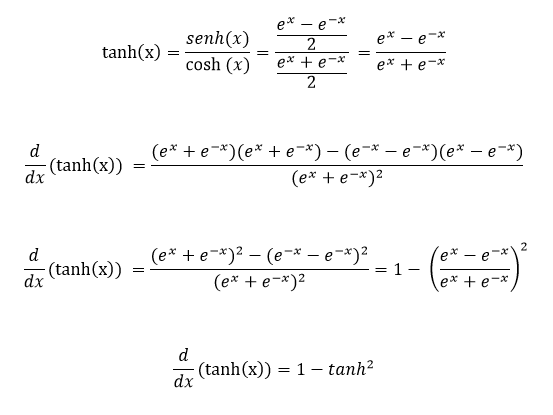



In [340]:
# Hyperparameters
n_hidden = 2 # Número de unidades en la capa escondida                      O(1)
epochs = 100 # Número de iteraciones sobre el conjunto de entrenamiento    O(1)
alpha = 0.01 # Taza de aprendizaje                                          O(1)

ult_costo = None 

m,k = features.shape # Número de ejemplos de entrenamiento, número de dimensiones en los datos O(1)
# Inicialización de los pesos
entrada_escondida = np.random.normal(scale = 1/k**0.5,size = (k,n_hidden))  # O(1)
escondida_salida = np.random.normal(scale = 1/k**0.5,size = n_hidden)       # O(1)
print(entrada_escondida.shape)                                              # O(1)
print(escondida_salida.shape)                                               # O(1)
# Entrenamiento

for e in range(epochs):                                                     # O(epochs)
    # Variables para el gradiente
    gradiente_entrada_escondida = np.zeros(entrada_escondida.shape)
    gradiente_escondida_salida =  np.zeros(escondida_salida.shape)
    # Itera sobre el conjunto de entrenamiento
    for x,y in zip(features.values,targets):                                # O(min(len(features.values,targets)))                               
        # Pasada hacia adelande (forward pass) or forward propagation
        z = np.tanh(np.matmul(x, entrada_escondida))                       # O(1)
        y_ =np.tanh(np.matmul(escondida_salida,z)) # predicción            # O(1)
        # Pasada hacia atrás (backward pass)
        salida_error = (y - y_) * (1-np.tanh(y_))    #Aqui aplicamos la derivada hallada anteriormente                           # O(1)
        
        escondida_error = np.dot(salida_error, escondida_salida) * z * (1 -z) # O(1)

        gradiente_entrada_escondida += escondida_error * x[:,None]          # O(1)
        gradiente_escondida_salida += salida_error * z                      # O(1)
    # Actualiza los parámetros (pesos)
    entrada_escondida += alpha * gradiente_entrada_escondida / m            # O(1)
    escondida_salida +=  alpha * gradiente_escondida_salida / m             # O(1)

    if e % (epochs / 10 ) == 0:                                             # O(1)
        z = np.tanh(np.dot(features.values, entrada_escondida))            # O(1)
        y_ = np.tanh(np.dot(z, escondida_salida))                          # O(1)

        # Función de costo
        costo = np.mean(( y_ - targets)**2 )                                # O(1)

        if ult_costo  and ult_costo < costo:                                # O(1)
            print("Costo de  entrenamiento: ", costo, " ADVERTENCIA -  Costo subiendo") # O(1)
        else:
            print("Costo de entrenamiento: ", costo )                       # O(1)
        
        ult_costo = costo                                                   # O(1)

#  Precisión en los datos de prueba 
z = sigmoide(np.dot(features_test, entrada_escondida))                      # O(1)
y_ = sigmoide(np.dot(z, escondida_salida))                                  # O(1)



predicciones =  y_ > 0.5    
#print(predicciones)                                                        # O(1)
precision = np.mean(predicciones == targets_test)                           # O(1)
print("Precisión: {:.3f}".format(precision))                                # O(1)

(6, 2)
(2,)
Costo de entrenamiento:  0.2679435009653059
Costo de entrenamiento:  0.267286216599788
Costo de entrenamiento:  0.2666537344119538
Costo de entrenamiento:  0.2660451044215652
Costo de entrenamiento:  0.26545942008678075
Costo de entrenamiento:  0.264895815884356
Costo de entrenamiento:  0.2643534650645234
Costo de entrenamiento:  0.2638315775641106
Costo de entrenamiento:  0.2633293980632896
Costo de entrenamiento:  0.2628462041729509
Precisión: 0.650


Como podemos observar, con la función de tangente obtenemos un costo de entrenamiento mayor con la misma cantidad de iteraciones sobre los datos, por lo que podemos concluir que para este set de datos, es más conveniente una función de activación de Sigmoide en lugar de tangente hiperbólica